In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
datairis=load_iris()

In [4]:
datairis.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
datairis.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df=pd.DataFrame(datairis.data,columns=datairis.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=datairis.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# 0--> Setosa 1-->Versicolor 2-->Virginica 

In [11]:
# we can visualize each class of target (0,1,2)

In [12]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
# we can add one more column into df as "fname"

In [14]:
# by using Lmbda method

In [15]:
df['fname']=df.target.apply(lambda x : datairis.target_names[x])

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,fname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
#  we will try to plot 3 types of target using matplotlib

In [18]:
# create 3 different DF for 3 different types of targets

In [19]:
# ds1 = Setosa  ds2=Versicolor ds3=Verginica

In [20]:
ds1=df[df.target==0]
ds2=df[df.target==1]
ds3=df[df.target==2]

In [21]:
ds1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,fname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
import matplotlib.pyplot as pl

Text(0, 0.5, 'sepal width')

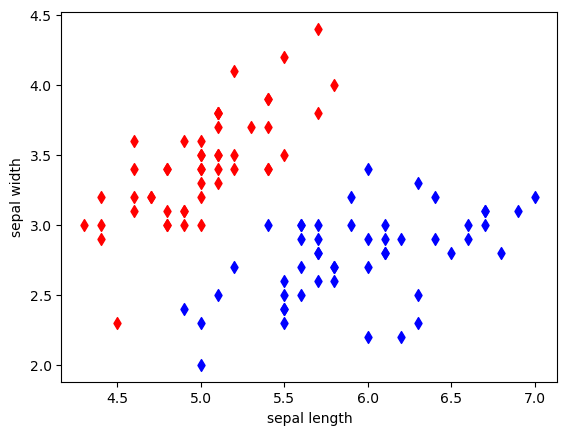

In [23]:
pl.scatter(ds1['sepal length (cm)'],ds1['sepal width (cm)'],color='r',marker='d')
pl.scatter(ds2['sepal length (cm)'],ds2['sepal width (cm)'],color='b',marker='d')
pl.xlabel('sepal length')
pl.ylabel('sepal width')

In [24]:
# X-->input Y-->output

In [25]:
# dropping fname column from the above dataframe

In [26]:
X=df.drop(['target','fname'],axis='columns')

In [27]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y=df.target

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

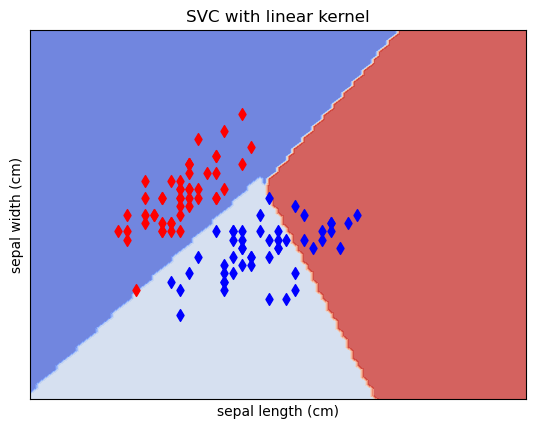

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Create an instance of SVM and fit the data
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel="linear", C=C)
clf.fit(X, y)

# Title for the plot
title = "SVC with linear kernel"

# Set up a 1x1 grid for plotting (since we only have one model)
fig, ax = plt.subplots()  # Create a single subplot
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Visualize decision boundaries
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Scatter plot for the data points
#ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.scatter(ds1['sepal length (cm)'],ds1['sepal width (cm)'],color='r',marker='d')
ax.scatter(ds2['sepal length (cm)'],ds2['sepal width (cm)'],color='b',marker='d')
# Set title and remove ticks
ax.set_title(title)
ax.set_xticks(())
ax.set_yticks(())

# Show the plot
plt.show()


In [33]:
len(X_train)

120

In [34]:
len(X_test)

30

In [35]:
clf = svm.SVC(kernel="linear")


In [36]:
clf

SVC(kernel='linear')

In [37]:
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [38]:
clf.predict([[5.7,2.6,3.5,1.0]])

C:\Users\DIPTIRANJAN BISWAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [39]:
y_predict=clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_predict,y_test)

0.9666666666666667

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm=confusion_matrix(y_predict,y_test)

In [54]:
cm

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

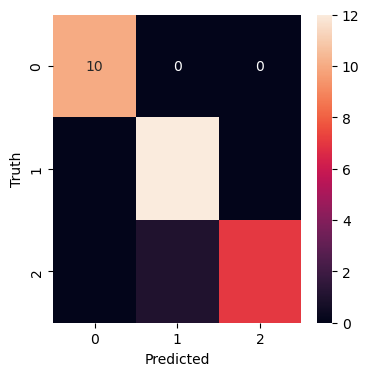

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')